## Задание 1
##### Импортируйте библиотеки pandas, numpy и matplotlib.
##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [68]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

##### Создайте датафреймы X и y из этих данных. C помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42


In [69]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Масштабируйте данные с помощью StandardScaler.


In [71]:
scaler = StandardScaler()

In [72]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=feature_names)

##### Постройте модель TSNE на тренировочный данных с параметрами:
##### n_components=2, learning_rate=250, random_state=42.
##### Постройте диаграмму рассеяния на этих данных.


In [73]:
from sklearn.manifold import TSNE

In [74]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [75]:
X_train_tsne = tsne.fit_transform(X_train_scaled)


In [76]:
X_train_tsne[0]

array([28.13809 , 18.375324], dtype=float32)

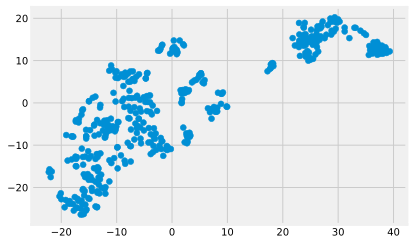

In [77]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

## Задание 2
##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
##### Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [78]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [103]:
labels_train = kmeans.fit_predict(X_train)

In [104]:
pd.value_counts(labels_train)

0    297
2     76
1     31
dtype: int64

In [124]:
labels_train.shape

(404,)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,и раскрасьте точки из разных кластеров разными цветами.


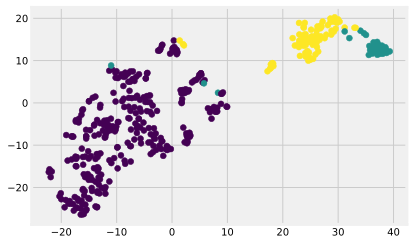

In [106]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=labels_train)

##### Вычислите средние значения price и CRIM в разных кластерах.

In [111]:
X_train.loc[labels_train==0, 'RM'].mean()

6.417195286195285

In [112]:
X_train.loc[labels_train==1, 'RM'].mean()

6.135999999999999

In [113]:
X_train.loc[labels_train==2, 'RM'].mean()

5.993381578947368

In [114]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.40486282828282844

In [115]:
X_train.loc[labels_train==1, 'CRIM'].mean()

14.360380322580648

In [116]:
X_train.loc[labels_train==2, 'CRIM'].mean()

11.745661842105266

(0.0, 12.0)

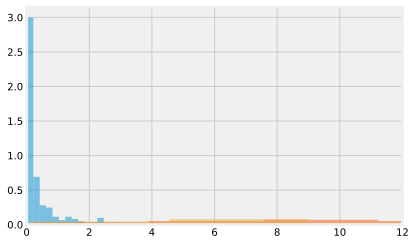

In [117]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.xlim(0, 12)

## Задание 3
##### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.


In [143]:
labels_test = kmeans.fit_predict(X_test)

In [144]:
pd.value_counts(labels_test)

1    69
2    26
0     7
dtype: int64

In [145]:
labels_test.shape

(102,)

##### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [125]:
X_test.loc[labels_test==0, 'RM'].mean()

5.753285714285714

In [128]:
X_test.loc[labels_test==1, 'RM'].mean()

6.281710144927537

In [129]:
X_test.loc[labels_test==2, 'RM'].mean()

5.949769230769231

In [136]:
X_test.loc[labels_test==0, 'CRIM'].mean()

19.021665714285714

In [137]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.2464211594202899

In [138]:
X_test.loc[labels_test==2, 'CRIM'].mean()

8.469301923076923